In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import os
import seaborn as sns
from IPython.display import display
import numpy as np
import re
import json


pd.options.display.max_columns = None
%matplotlib inline

# 한글 폰트
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔 고딕의 경로
font_prop = fm.FontProperties(fname=font_path).get_name()

# 한글 폰트 설정}
matplotlib.rcParams['font.family'] = font_prop

# 전역 팔레트 설정 (예: 'Set2' 팔레트 사용)
sns.set_palette('Set2')


In [2]:
# 데이터 불러오기
regular_season = pd.read_csv('../datas/Regular_Season_Batter.csv')

# 키와 몸무게로 분석
'''
키와 몸무게 그리고 포지션에서도 결측치가 존재한다.
'''

# 결측치 확인
print(regular_season.isna().sum())
regular_season.head(2)


batter_id             0
batter_name           0
year                  0
team                  0
avg                   0
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight         0
year_born             0
position              0
career                0
starting_salary    1067
OPS                   0
pos                   0
hand                  0
country               0
dtype: int64


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,pos,hand,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,내야수,우타,외국인
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,내야수,좌타,한국인


In [ ]:
'''
키/몸무게/포지션을 채워주려고 한다.
선수 키/몸무게/포지션은 KBO 홈페이지에서, 그리고 우투우타, 좌투우타와 같은 경우는 위키백과에서 검색하여 가져왔다.
'''

'./batter_height_weight_position_insert.ipynb';


from ..batter_height_weight_position_insert import crawl_hand

df_path = '../datas/Regular_Season_Batter.csv'

# regular_season = pd.read_csv(df_path)
crawl_hand(regular_season, df_path)

regular_season = pd.read_csv(df_path)


SyntaxError: invalid syntax (3197165270.py, line 9)

In [ ]:
# def insert_batter_info(row, batter_height_weight_position):
#     name = row['batter_name']
#     if name in batter_height_weight_position:
#         info = batter_height_weight_position[name]
#         height_weight, position = info.split('/')[0] + '/' + info.split('/')[1], info.split('/')[2]
        
#         row['height/weight'] = height_weight
#         row['position'] = position

#         # display(row[['height/weight', 'position']])
        
#     return row

with open('../output_data.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)
print(type(data))
# data

# apply를 사용하여 각 행에 대해 업데이트 적용
regular_season = regular_season.apply(insert_batter_info, axis=1, batter_height_weight_position=data)
display(regular_season[regular_season['batter_name'] == '유재혁'][['batter_name', 'height/weight', 'position']])

regular_season.isna().sum()


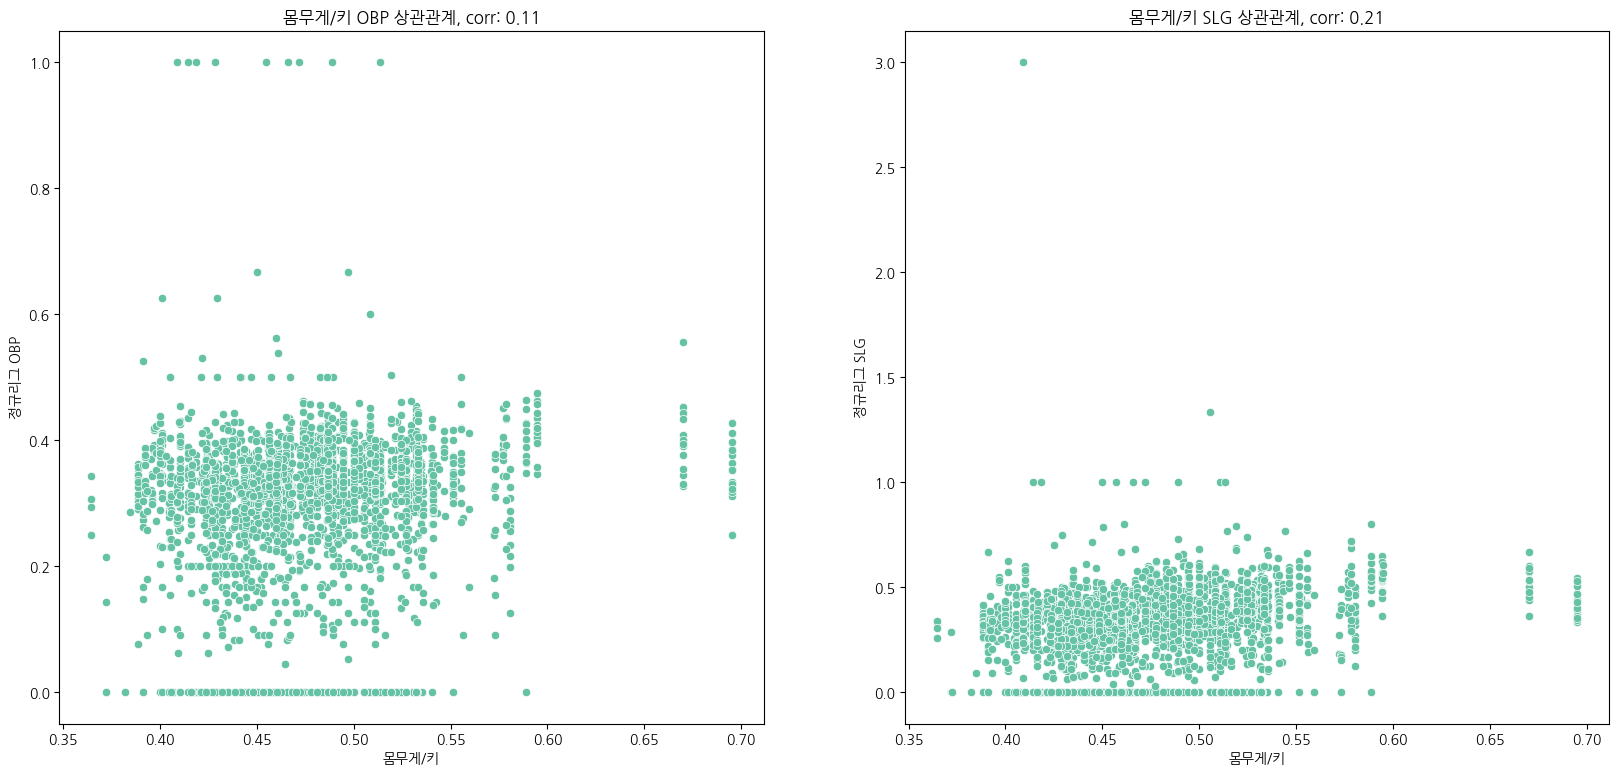

In [5]:
'''
키 대비 몸무게 계산
높다면 몸무게가 무거워 힘이 세고, 적으면 그만큼 가벼워 스피드가 빠를 것이라 예상
힘은 연관된 장타율과, 스피드는 연관된 출루율과 상관관계를 분석
'''

# 키와 몸무게를 분리
regular_season['height'] = regular_season['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[0])[0]))
regular_season['weight'] = regular_season['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[1])[0]))

# 키 대비 몸무게
regular_season['weight_per_height'] = regular_season['weight'] / regular_season['height']

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)

obp_weight_corr = regular_season['weight_per_height'].corr(regular_season['OBP'])
slg_weight_corr = regular_season['weight_per_height'].corr(regular_season['SLG'])

sns.scatterplot(x = regular_season['weight_per_height'], y = regular_season['OBP'])
plt.title('몸무게/키 OBP 상관관계, corr: '+str(round(obp_weight_corr, 2)))
plt.ylabel('정규리그 OBP')
plt.xlabel('몸무게/키')

plt.subplot(1,2,2)
sns.scatterplot(x = regular_season['weight_per_height'], y = regular_season['SLG'])
plt.title('몸무게/키 SLG 상관관계, corr: '+str(round(slg_weight_corr, 2)))
plt.ylabel('정규리그 SLG')
plt.xlabel('몸무게/키')
plt.show()

'''
선형적인 모습이 나오지 않는 것을 보아 상관관계는 없는 것 같다.
''';
